In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv")

In [5]:
df.shape

(1460, 81)

### There are 1460 rows and 81 columns

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### There are 43 object type cols, 35 integer type cols, 3 float type cols

In [8]:
df.isnull().sum().sum()

np.int64(7829)

In [9]:
df.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
BldgType           0
Neighborhood       0
LandSlope          0
LotConfig          0
Condition1         0
dtype: int64

### There are 7829 missing values and 5-6 cols have missing values greater than haalf of its entries so we can drop it

In [10]:
df.duplicated().sum()

np.int64(0)

### There is no duplicate row

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### There are many cols to study the so we are going to analyze the top 15-20 cols which give more insights of the data
<br>
<br>

# Univariate Analysis

In [12]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='MSSubClass', ylabel='count'>

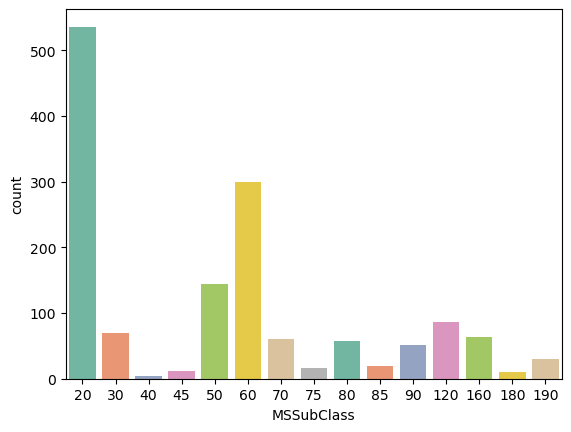

In [13]:
sns.countplot(data=df, x="MSSubClass" , palette="Set2") 

### Most of the houses are of single type (20 -> most frequent)
### Some houses are of medium size which are suitable for a family (50,60 MSSubClass)
### Very less houses are of large size

Text(0.5, 0, 'MSZoning')

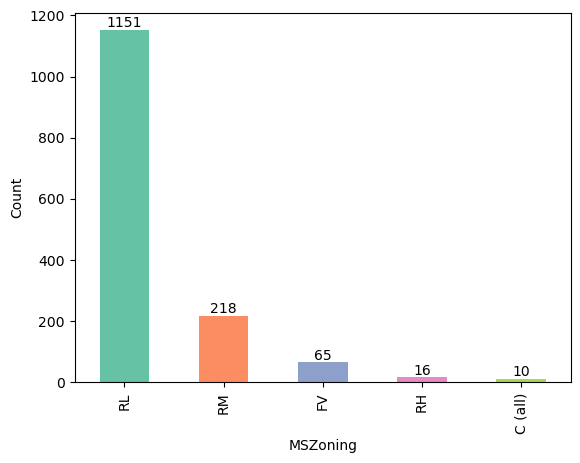

In [30]:
ax = df['MSZoning'].value_counts().plot(kind='bar', color=sns.color_palette('Set2'))
ax.bar_label(ax.containers[0])
ax.set_ylabel('Count')
ax.set_xlabel('MSZoning')

### Most of the houses are of Residential low density(RL) and very few for commercial purpose -> shops and offices(C)
FV - Floating Village,
RM - Residential Medium Density,
RH - Residential High Density 

<Axes: xlabel='LotFrontage', ylabel='Count'>

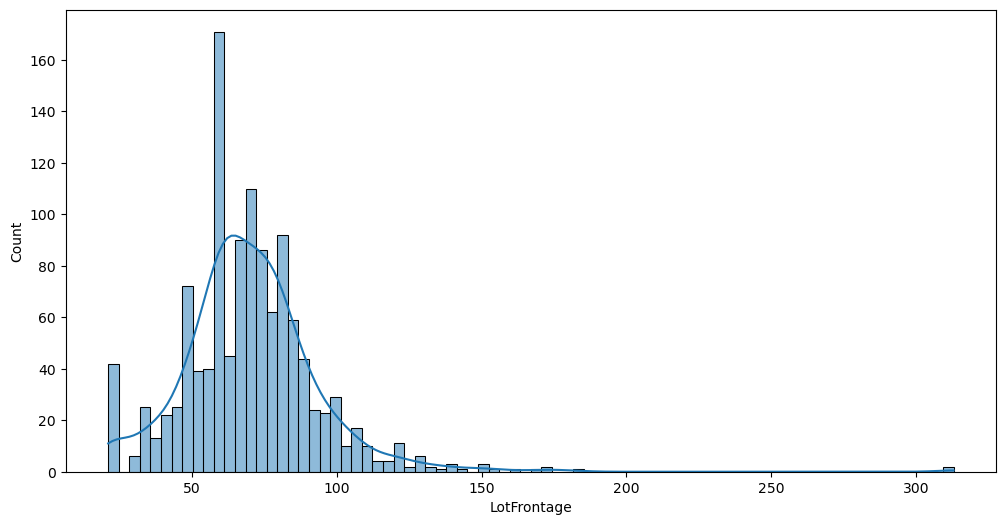

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="LotFrontage" , bins= 80 , kde = True)

### Most of the houses have Lotfrontage (Property ke aage jagah) of 60-80 sq. feet
### Very less no. of houses which have greater than 120 sq. feet Lotfrontage

<Axes: xlabel='LotArea', ylabel='Count'>

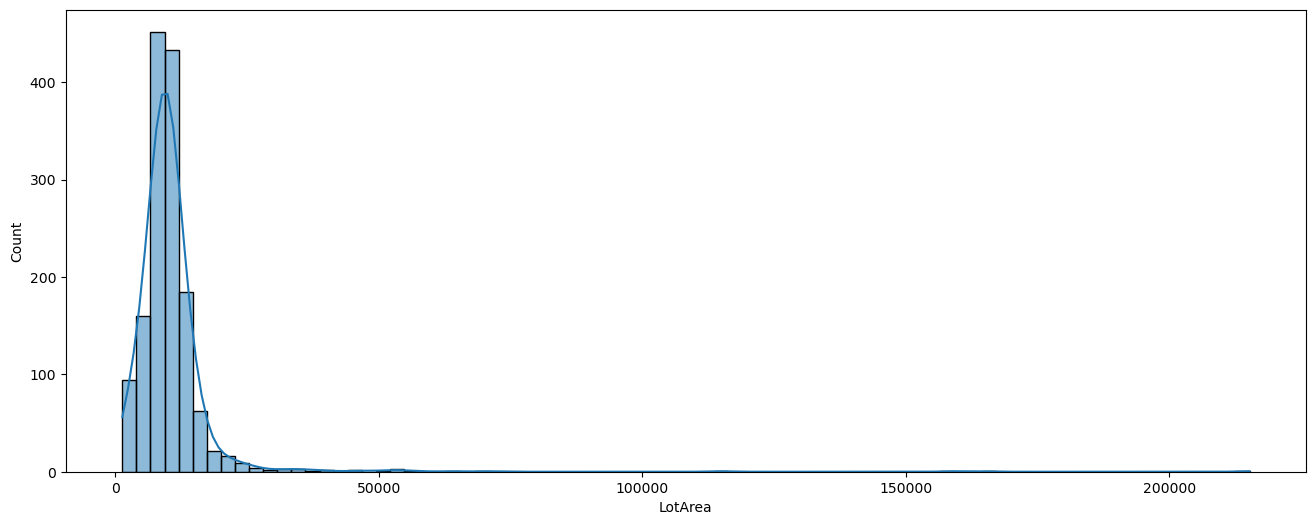

In [16]:
plt.figure(figsize=(16,6))
sns.histplot(data=df, x="LotArea" , bins = 80 , kde = True)

 The standard deviation of Lotarea is very high that implies the data is highly spreaded & from above we can see that some have very large area and many (>75%) has lot area of about 11000 sq. feet . Some outliers may also be present in this column

[Text(0, 0, '1454'), Text(0, 0, '6')]

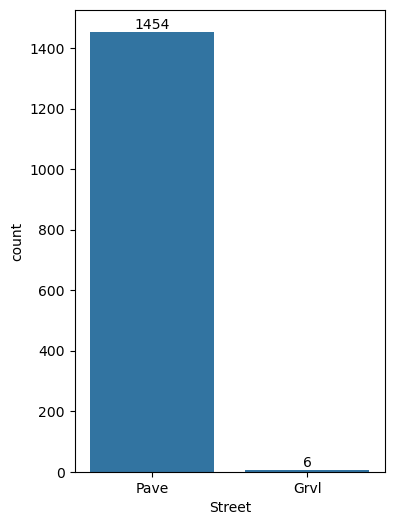

In [17]:
plt.figure(figsize=(4,6))
ax = sns.countplot(data=df, x="Street")
ax.bar_label(ax.containers[0])

### Most of thr houses have Pave Street (modern) and only 6 house have grvl street(less developed)

[Text(0, 0, '50'), Text(0, 0, '41')]

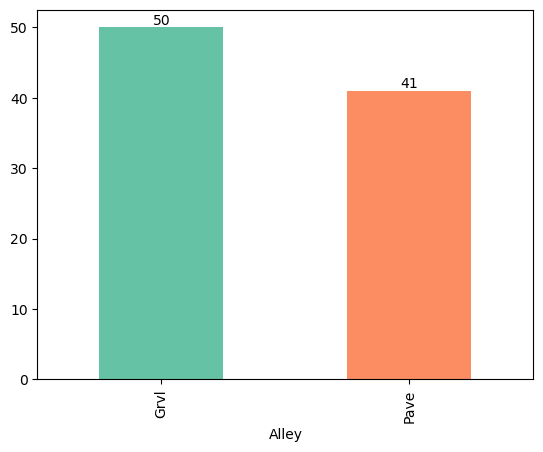

In [31]:
ax = df['Alley'].value_counts().plot(kind='bar', color=sns.color_palette('Set2'))
ax.bar_label(ax.containers[0])

### There are only something 90 values total which tells there is lot of null values in this column 
### In this null values signifies there is no alley(small path) present around the houses.

Text(0, 0.5, '')

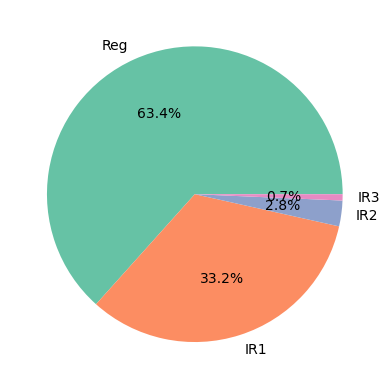

In [25]:
df['LotShape'].value_counts().plot.pie(labels=df['LotShape'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.ylabel('')

### Most of the houses have regular shape and very few are highly irregular in shape

[Text(0, 0, '1459')]

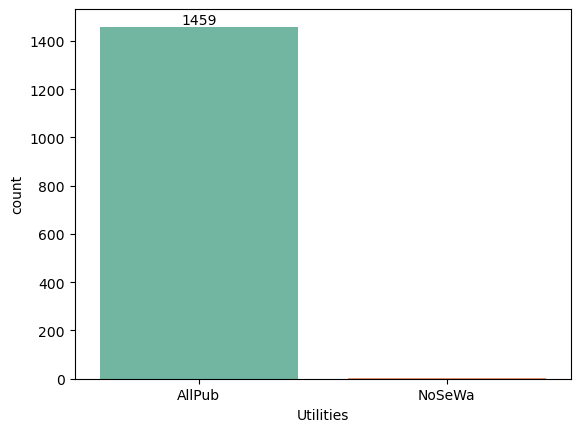

In [20]:
ax = sns.countplot(data=df, x="Utilities" , palette="Set2")
ax.bar_label(ax.containers[0])

### Excluding one All houses have All public facilities

<Axes: xlabel='OverallQual', ylabel='count'>

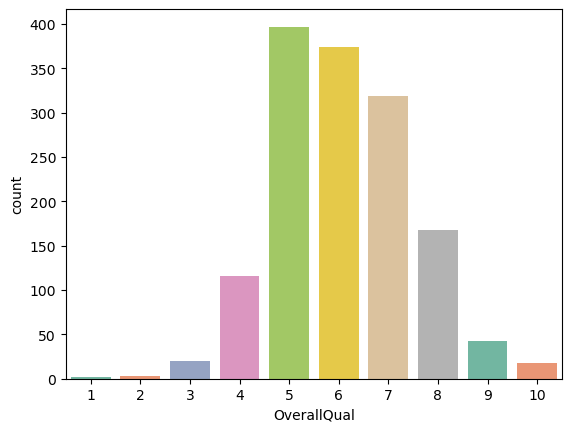

In [21]:
sns.countplot(data=df, x="OverallQual" , palette="Set2")

### Most of the houses have Quality rating of 5-7

<Axes: xlabel='OverallCond', ylabel='count'>

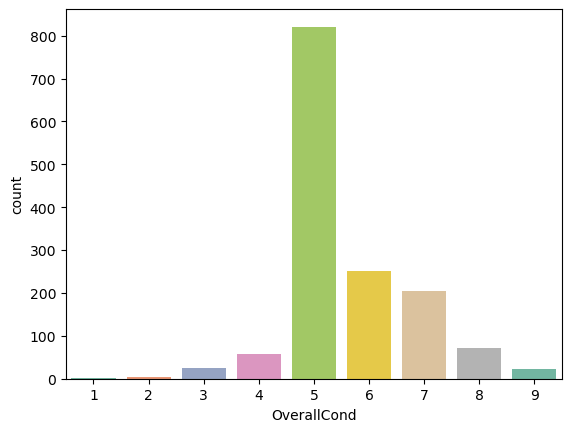

In [22]:
sns.countplot(data=df, x="OverallCond" , palette="Set2")   

### Most of the houses have overall condition rating of 5 which implies that quality of houses is average.

Text(0, 0.5, '')

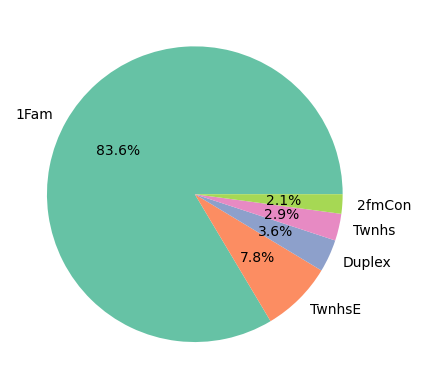

In [40]:
ax = df['BldgType'].value_counts().plot.pie(labels=df['BldgType'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.ylabel('')


### 83.6 Houses are are 1-Family Building Type

<Axes: xlabel='YearBuilt'>

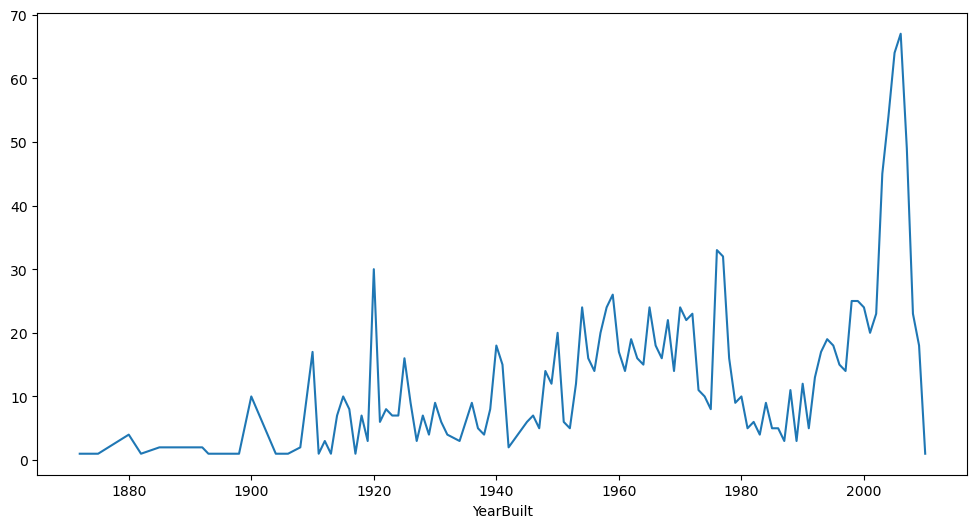

In [44]:
df['YearBuilt'].value_counts().sort_index().plot(kind='line', figsize=(12,6))

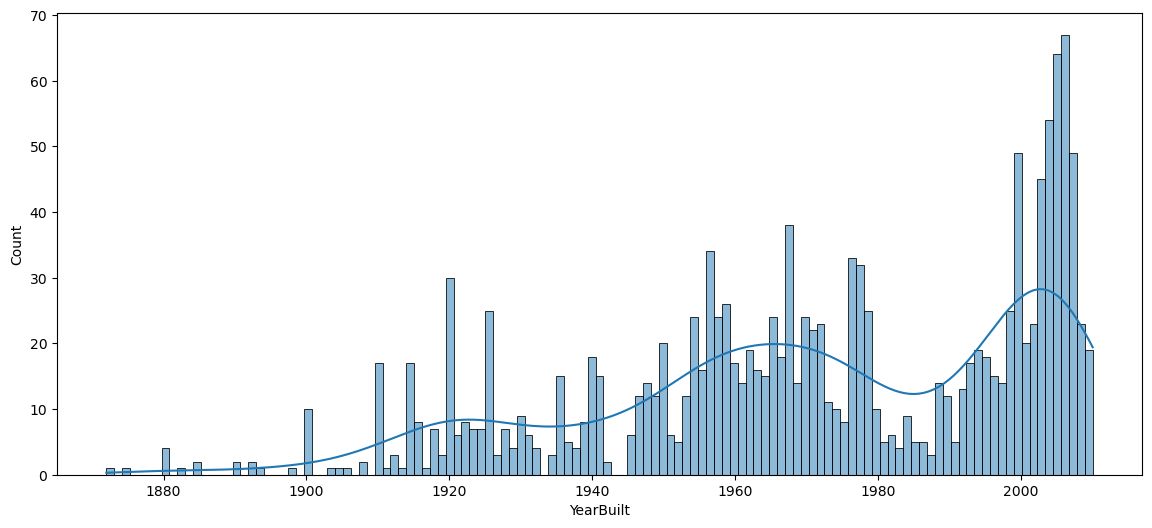

In [54]:
plt.figure(figsize=(14,6))
ax = sns.histplot(data = df , x = 'YearBuilt' , bins = 125 , kde = True)

### Large no. of houses are build after 2000 and also there are some years where no houses are build(initially)

Text(0.5, 1.0, 'Foundation Types')

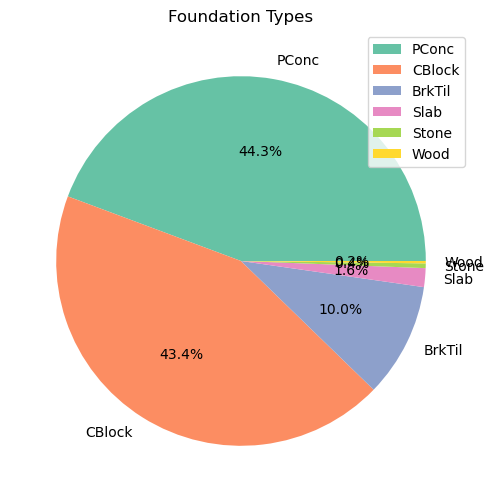

In [79]:
plt.figure(figsize=(10,6))
df['Foundation'].value_counts().plot.pie(labels=df['Foundation'].value_counts().index , autopct = '%1.1f%%', colors=sns.color_palette('Set2'), legend = True)
plt.ylabel('')
plt.title('Foundation Types')

### Most of the house have foundation of PConc('Modern & High Quality') and CBlock('hollow in middle') which states that Most of the houses have strong foundation while very few have wood and stone foundation(old method)

Text(0, 0.5, 'Count')

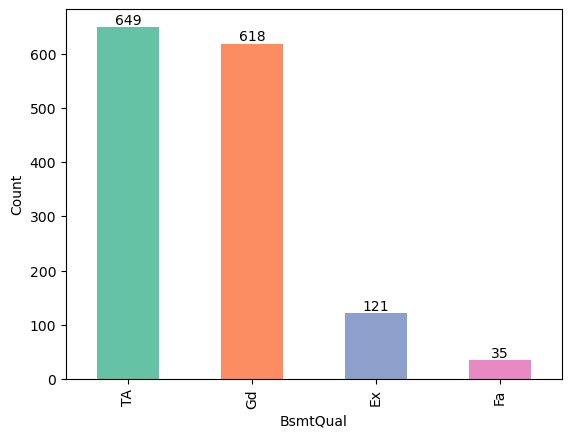

In [82]:
ax  = df['BsmtQual'].value_counts().plot(kind='bar', color=sns.color_palette('Set2'))
ax.bar_label(ax.containers[0])
ax.set_ylabel('Count')

### More than 85% house's Basement Qual is Typical/average or good &  only 121 are of excellent quality

[Text(0, 0, '6'),
 Text(0, 0, '50'),
 Text(0, 0, '358'),
 Text(0, 0, '804'),
 Text(0, 0, '213'),
 Text(0, 0, '21'),
 Text(0, 0, '7'),
 Text(0, 0, '1')]

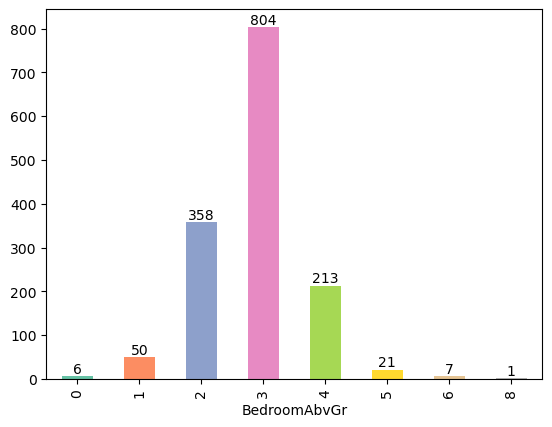

In [88]:
ax = df['BedroomAbvGr'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette('Set2'))
ax.bar_label(ax.containers[0])

### In mostly building there are 3 bedrooms above the Ground Floor & 6 building have 0 bedroom above GF

[Text(0, 0, '1')]

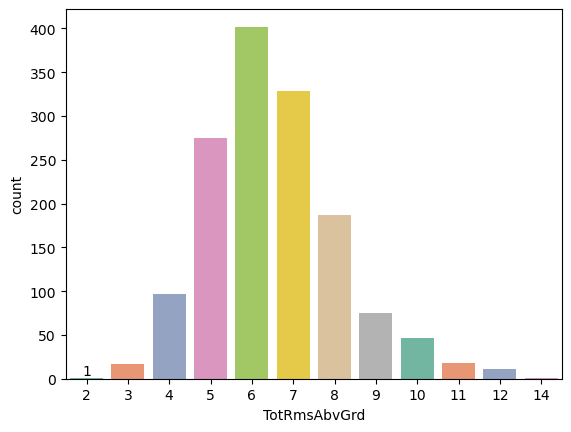

In [91]:
sns.countplot(data=df, x="TotRmsAbvGrd" , palette="Set2") 

### most of the houses have 5-7 rooms above Gndfloor

<Axes: xlabel='GarageQual', ylabel='count'>

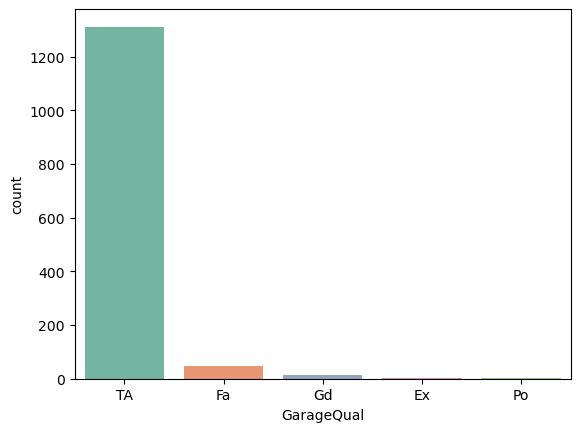

In [93]:
sns.countplot(data=df , x = 'GarageQual' , palette = 'Set2')

### Most of the building has garage quality Typical/Average while only few have good quality Garage

[Text(0, 0, '1453')]

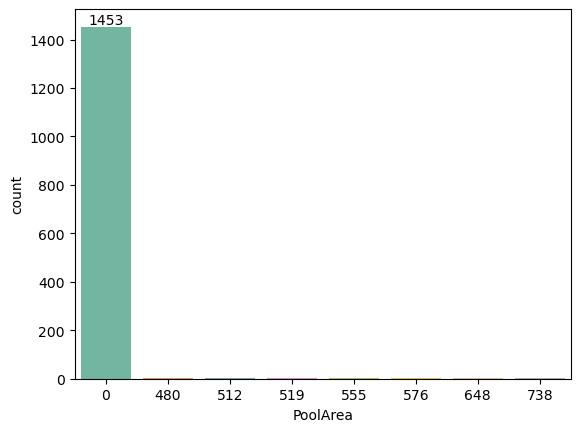

In [95]:
ax = sns.countplot(data=df, x="PoolArea" , palette="Set2")
ax.bar_label(ax.containers[0])

### Only 7 houses have Pool available

<Axes: xlabel='MoSold', ylabel='count'>

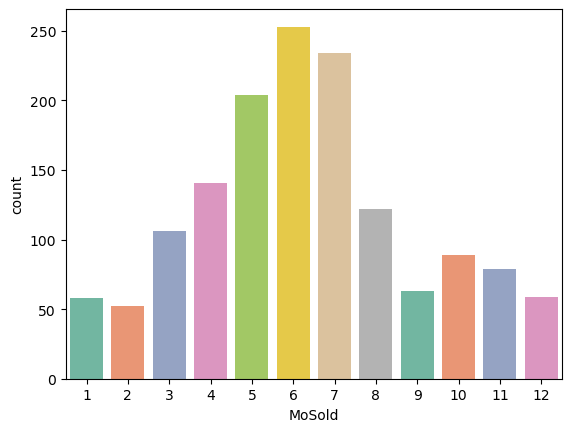

In [96]:
sns.countplot(data=df, x="MoSold" , palette="Set2")

### Most of the house are sold in summer season (May-June-July)

[Text(0, 0, '314'),
 Text(0, 0, '329'),
 Text(0, 0, '304'),
 Text(0, 0, '338'),
 Text(0, 0, '175')]

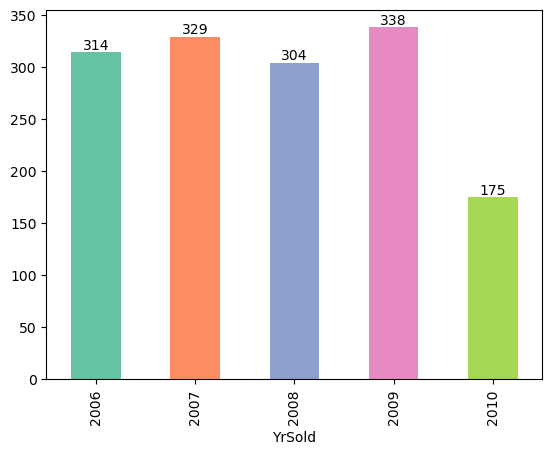

In [99]:
ax = df['YrSold'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette('Set2'))
ax.bar_label(ax.containers[0])

### The houses are sold almost in equal years except the 2010 which is obvious as there are 1460 houses in that

[Text(0, 0, '1267'),
 Text(0, 0, '122'),
 Text(0, 0, '43'),
 Text(0, 0, '9'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2')]

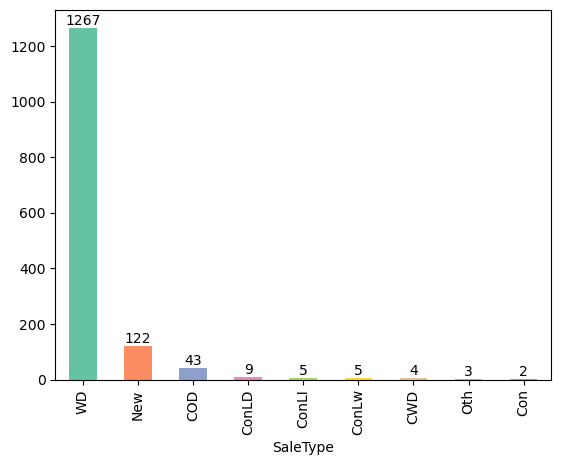

In [109]:
ax = df['SaleType'].value_counts().plot(kind='bar', color=sns.color_palette('Set2'))
ax.bar_label(ax.containers[0])

### Most houses are normally sold (WD) and 122 houses are newly built and sold instantly

[Text(0, 0, '1198'),
 Text(0, 0, '125'),
 Text(0, 0, '101'),
 Text(0, 0, '20'),
 Text(0, 0, '12'),
 Text(0, 0, '4')]

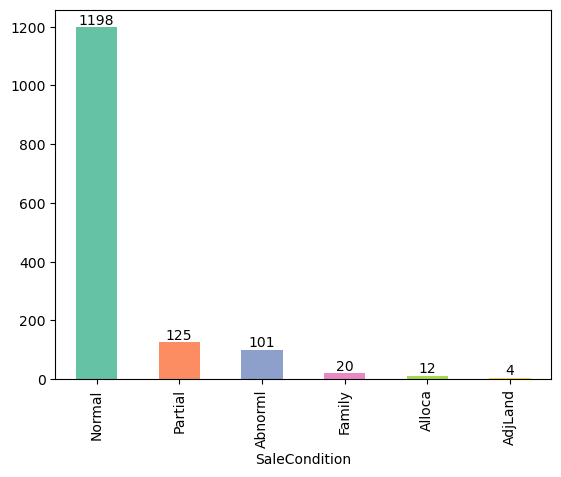

In [110]:
ax = df['SaleCondition'].value_counts().plot(kind='bar', color=sns.color_palette('Set2'))
ax.bar_label(ax.containers[0])

### Most houses are normally sold and 125 houses are not completed yet while 4 houses are sold in place od adjacent land 

<Axes: xlabel='SalePrice', ylabel='Count'>

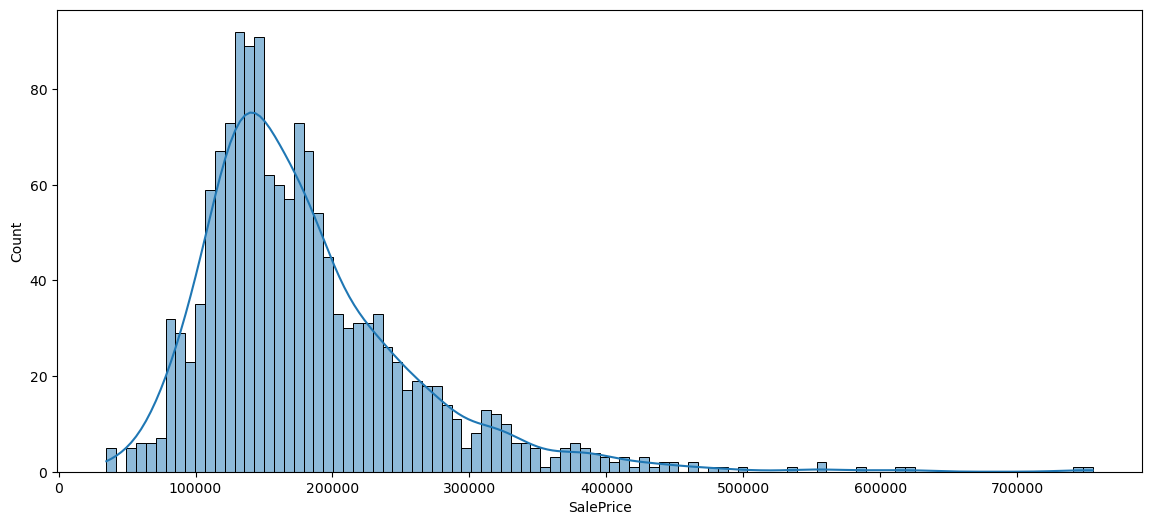

In [113]:
plt.figure(figsize=(14,6))
sns.histplot(data = df , x = 'SalePrice' , bins = 100 , kde = True) 

### Most of the houses ranges from 1 Lakh to 2 Lakh

<br>
<br>
<br>

# SUMMARY OF UNIVARIATE ANALYSIS 

-> Most of the houses are of 1-Family Type(83.6%) & very few are of large size<br>
-> Most of the houses have Low Residential Density which offers space for the families for better living and privacy & very few for Commercial purpose<br>
-> Most houses have Lotfrontage area(property ke aage ki jgh ) of 60-80 sq.feet<br>
-> Most houses have LotArea below 10000 sq.feet<br>
-> Most houses have Pave Street[Modern](1454) and 6 houses have Gravel(less deve.)<br>
-> There are 41 houses have Pave Alley & 50 houses have Grvl Alley and rest have no Alley<br>
-> Around 63% houses have Regular shape and very few are highly irregular in shape<br>
-> Excluding one All houses have public facilities<br>
-> Most houses have overall condition rating of 5 which implies houses are in average condition<br>
-> Most of the houses have Quality Rating of 5-7 <br>
-> After 2000 , there is rapid increase in house building<br>
-> Most houses have foundation type of PConc(Modern & High Qual) and CBlock(hollow in middle) , very few have wood or stone found. type <br>
-> More than 85% house's Basement Quality is Typical/Average or Good & 121 houses have excellent Quality <br>
-> In mostly building there are 3 bedrooms & 5-7 rooms above ground floor<br>
-> Most building have Typical/Average Garage Quality<br>
-> Only 7 houses have Pool Availability<br>
-> Most of the houses are sold in summer season <br>
-> The houses are sold equally over the years from 2006 to 2009<br>
-> Most houses are sold normally & 122 houses newly build and instantly build while 125 are sold but not completed yet. 4 houses are sold in place of adjacent land<br>
-> Most house's have price ranges from 1 Lakh to 2 Lakh <br>
<br>
<br>